# MovieLens Data Exploratory Analysis

MovieLens dataset - a classic dataset for training recommendation models. It can be obtained from the GroupLens website. There are various datasets, but the one that I will use below consists of 100,000 movie ratings by users (on a 1-5 scale). 


The main data file consists of a tab-separated list with user-id (starting at 1), item-id (starting at 1), rating, and timestamp as the four fields.

#### Loading Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import random
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [17]:
#Loading ratings data
movies_data=pd.read_csv('gdrive/My Drive/Recommendation system project/small_dataset/movies.csv')
rating_data = pd.read_csv("gdrive/My Drive/Recommendation system project/small_dataset/ratings.csv")

In [4]:
rating_data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
n_users = len(rating_data['userId'].unique())
n_items = len(rating_data['movieId'].unique())
R_shape = (n_users, n_items)
print(str(n_users) + ' users')
print(str(n_items) + ' items')

610 users
9724 items


#### Visualizing ratings distribution

Text(0.5, 1.0, 'Distribution of ratings')

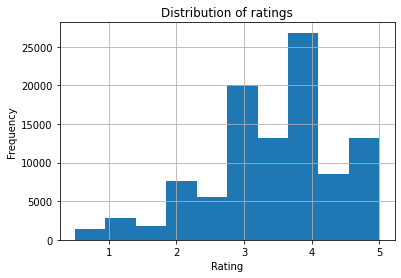

In [6]:
rating_data['rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')

#### Visualizing ratings after normalization¶

Text(0.5, 1.0, 'Distribution of normalized ratings')

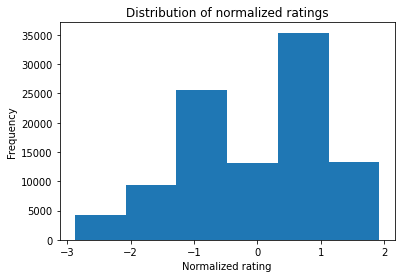

In [7]:
from sklearn.preprocessing import scale
binwidth = 0.8
data = scale(rating_data['rating'].astype(float))
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))    # Z-score normalization
plt.xlabel('Normalized rating')
plt.ylabel('Frequency')
plt.title('Distribution of normalized ratings')

#### Number of ratings for each year



We can convert it to timestamp type and extract year and month and sort the records by timestamp.

In [11]:
rating_data['timestamp'] = rating_data['timestamp'].apply(datetime.fromtimestamp)
rating_data['year'] = rating_data['timestamp'].dt.year
rating_data['month'] = rating_data['timestamp'].dt.month
rating_data['date'] = rating_data['timestamp'].dt.date
rating_data = rating_data.sort_values('timestamp').reset_index(drop=True)

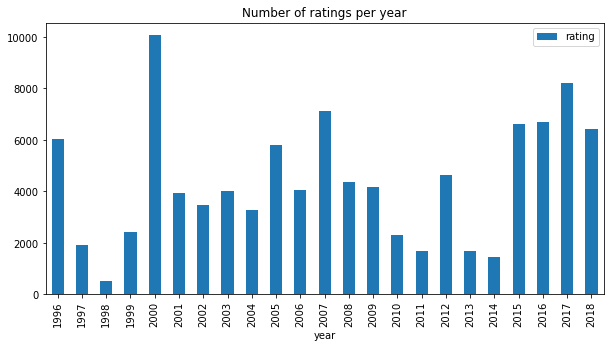

In [12]:
rating_data[['year', 'rating']].groupby(['year']).count().reset_index().plot.bar(x='year', y='rating', title='Number of ratings per year', figsize=(10, 5));

We can see that the majority of ratings for the year 2000 are available (approximately 900k, which is equivalent to around 90 percent of the data points). Look now at the cumulative monthly ranking distribution.

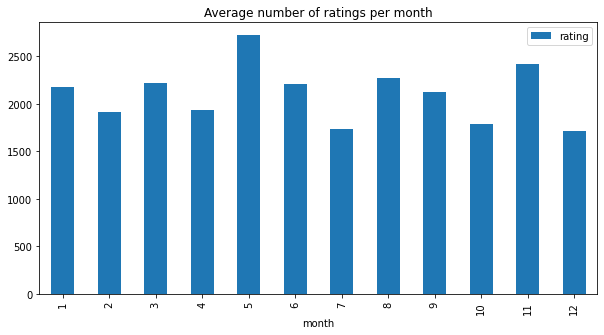

In [14]:
temp_df = rating_data[['month', 'rating']].groupby(['month']).count().reset_index()
temp_df['rating'] = temp_df['rating'] / 4
temp_df.plot.bar(x='month', y='rating', title='Average number of ratings per month', figsize=(10, 5));

It is observed that 5th month of the year(May) is having highest average number of the ratings.

#### visualizing average rating with respect to genres

In [23]:
# Loop to find avg rating on the basis of each genre.
genres_lis=['Romance', 'Fantasy', 'Animation', 'Action', 'Film-Noir', 'Adventure', 'Horror', 'IMAX', 'Musical', 'War', 'Drama', 'Comedy', 'Crime', 'Mystery', '(no genres listed)', 'Documentary', 'Western', 'Thriller', 'Children', 'Sci-Fi']
df=pd.merge(movies_data, rating_data, on='movieId', how='left' )
avg_rating=[]
for genre in genres_lis:
    avg_rating.append(df[df['genres'].str.contains(genre)]['rating'].mean())
# avg_rating

Text(0.5, 1.0, 'Avg. Rating W.R.T Genres')

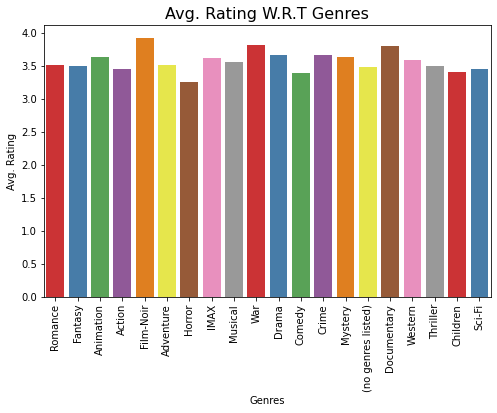

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(genres_lis, avg_rating,palette='Set1')
plt.xticks(rotation='vertical')
plt.ylabel('Avg. Rating')
plt.xlabel('Genres')
plt.title('Avg. Rating W.R.T Genres', fontsize=16)

#### References


1. https://github.com/nicolasfguillaume/Recommender-Systems-Making-Movies-Recommendation/blob/master/MovieLens%20(NMF)%20v1.ipynb

2. https://github.com/HarilalOP/movielens-data-exploration/blob/master/src/main/code/exploratory_analysis.ipynb
